In [1]:
from scipy.sparse.linalg import lsmr
from scipy.optimize import lsq_linear
from scipy.optimize import nnls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


epsilon = 1/5 # Rate of progression from exposed to infectious (the reciprocal is the incubation period)
gamma = 1/14 # Recovery rate of infectious individuals (the reciprocal is the infectious period)   

In [2]:
df = pd.read_excel('Public-Dataset-Age.XLSX')

In [3]:
df

,DATE,AGE_RANGE,AR_TOTALCASES,AR_TOTALPERCENT,AR_NEWCASES,AR_NEWPERCENT,AR_TOTALDEATHS,AR_NEWDEATHS
0,2021-06-02,0-10 years,48272,0.055895,32,0.084433,5.0,0.0
1,2021-06-02,11-20 years,111644,0.129274,46,0.121372,5.0,0.0
2,2021-06-02,21-30 years,156151,0.180810,67,0.176781,50.0,0.0
3,2021-06-02,31-40 years,134613,0.155871,61,0.160950,139.0,0.0
4,2021-06-02,41-50 years,128685,0.149007,59,0.155673,420.0,1.0
...,...,...,...,...,...,...,...,...
4475,2020-03-12,51-60 years,0,0.000000,0,0.000000,NaN,NaN
4476,2020-03-12,61-70 years,1,1.000000,1,1.000000,NaN,NaN
4477,2020-03-12,71-80 years,0,0.000000,0,0.000000,NaN,NaN
4478,2020-03-12,81+ years,0,0.000000,0,0.000000,NaN,NaN


In [4]:
df.dropna(inplace = True)
df=df.loc[df['AGE_RANGE'] != 'Pending']

In [5]:
df.loc[(df['AGE_RANGE'] == '0-10 years'),'AGE_RANGE']='Group1'
df.loc[(df['AGE_RANGE'] == '11-20 years'),'AGE_RANGE']='Group1'
df.loc[(df['AGE_RANGE'] == '21-30 years'),'AGE_RANGE']='Group2'
df.loc[(df['AGE_RANGE'] == '31-40 years'),'AGE_RANGE']='Group2'
df.loc[(df['AGE_RANGE'] == '41-50 years'),'AGE_RANGE']='Group3'
df.loc[(df['AGE_RANGE'] == '51-60 years'),'AGE_RANGE']='Group3'
df.loc[(df['AGE_RANGE'] == '61-70 years'),'AGE_RANGE']='Group4'
df.loc[(df['AGE_RANGE'] == '71-80 years'),'AGE_RANGE']='Group4'
df.loc[(df['AGE_RANGE'] == '81+ years'),'AGE_RANGE']='Group4'

C:\Users\Haoro\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [6]:
df

,DATE,AGE_RANGE,AR_TOTALCASES,AR_TOTALPERCENT,AR_NEWCASES,AR_NEWPERCENT,AR_TOTALDEATHS,AR_NEWDEATHS
0,2021-06-02,Group1,48272,0.055895,32,0.084433,5.0,0.0
1,2021-06-02,Group1,111644,0.129274,46,0.121372,5.0,0.0
2,2021-06-02,Group2,156151,0.180810,67,0.176781,50.0,0.0
3,2021-06-02,Group2,134613,0.155871,61,0.160950,139.0,0.0
4,2021-06-02,Group3,128685,0.149007,59,0.155673,420.0,1.0
...,...,...,...,...,...,...,...,...
4184,2020-04-10,Group3,800,0.164170,55,0.282051,5.0,0.0
4185,2020-04-10,Group3,900,0.184691,35,0.179487,9.0,0.0
4186,2020-04-10,Group4,609,0.124974,22,0.112821,29.0,6.0
4187,2020-04-10,Group4,305,0.062590,9,0.046154,24.0,0.0


In [7]:
df['AGE_RANGE'].unique()

array(['Group1', 'Group2', 'Group3', 'Group4'], dtype=object)

In [8]:
len(df['DATE'].unique())

417

In [9]:
new_df = df.groupby(['AGE_RANGE', 'DATE']).sum()

In [10]:
new_df

AR_TOTALCASES  AR_TOTALPERCENT  AR_NEWCASES  \
AGE_RANGE DATE                                                      
Group1    2020-04-10            283         0.058075           11   
          2020-04-11            296         0.057309           13   
          2020-04-12            311         0.057710           15   
          2020-04-13            323         0.057617           12   
          2020-04-14            335         0.057878           12   
...                             ...              ...          ...   
Group4    2021-05-29         161717         0.187511           33   
          2021-05-30         161745         0.187503           28   
          2021-05-31         161781         0.187504           36   
          2021-06-01         161847         0.187488           66   
          2021-06-02         161910         0.187478           63   

                      AR_NEWPERCENT  AR_TOTALDEATHS  AR_NEWDEATHS  
AGE_RANGE DATE                                                     
Group1    2020-04-10       0.056410             1.0           0.0  
          2020-04-11       0.044521             1.0           0.0  
          2020-04-12       0.066964             1.0           0.0  
          2020-04-13       0.055300             1.0           0.0  
          2020-04-14       0.065934             1.0           0.0  
...                             ...             ...           ...  
Group4    2021-05-29       0.170984         10722.0           0.0  
          2021-05-30       0.151351         10722.0           0.0  
          2021-05-31       0.190476         10728.0           6.0  
          2021-06-01       0.154567         10735.0           7.0  
          2021-06-02       0.166227         10740.0           5.0  

[1668 rows x 6 columns]

In [11]:
new_df.loc[('Group1', '2020-04-10')]['AR_TOTALCASES']

283.0

https://www.infoplease.com/us/census/tennessee/demographic-statistics

In [12]:
Population = 5689283
percentages = [27.4, 36.0, 20.1, 16.5]    #estimated percentages of each group from the info data
Days = len(df['DATE'].unique())

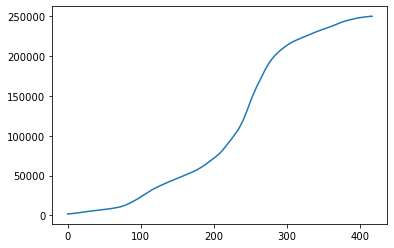

In [13]:
Groups = ['Group1', 'Group2', 'Group3', 'Group4']
Inf = dict()

for g in Groups:
    age_group = new_df.loc[g]
    Ii = []
    for k in range(0, 30):
        Ii.append(age_group['AR_TOTALCASES'].iloc[0])       #pad the front of signal
    for k in range(0, Days):
        Ii.append(age_group['AR_TOTALCASES'].iloc[k])
    for k in range(0, 30):
        Ii.append(age_group['AR_TOTALCASES'].iloc[Days-1])  #pad the end of signal 
    Ii = np.convolve(Ii, np.ones(15)/15, mode='same') #moving average filter 20 length
    Inf[g] = Ii[30:Days+30] #remove padding
    
plt.plot(range(Days),Inf['Group3'])

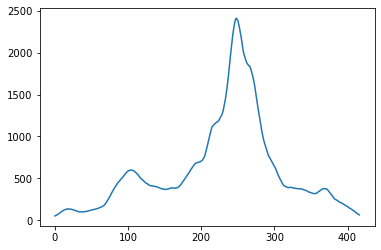

In [14]:
#Derive daily new infection 
newinf = dict()
for i in Groups:
    temp = []
    for k in range(0, 30):
        temp.append(Inf[i][1]-Inf[i][0])
    temp.append(Inf[i][1]-Inf[i][0])
    for k in range(1, Days):
        temp.append(Inf[i][k]-Inf[i][k-1])
    for k in range(0, 30):
        temp.append(Inf[i][Days-1]-Inf[i][Days-2])
    temp = np.convolve(temp, np.ones(10)/10, mode='same')
    newinf[i] = temp[30:Days+30]
   
plt.plot(range(Days),newinf['Group3'])


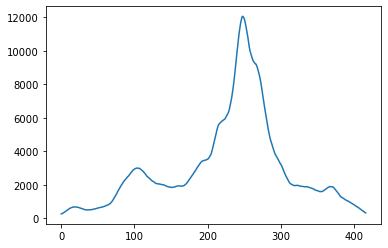

In [15]:
#Derive exposed E[n] 
incubation_days = 5

E = dict()
for i in Groups:
    temp = []
    for k in range(Days):
        temp.append(newinf[i][k]*incubation_days)
    E[i] = temp
plt.plot(range(Days),E['Group3'])
    

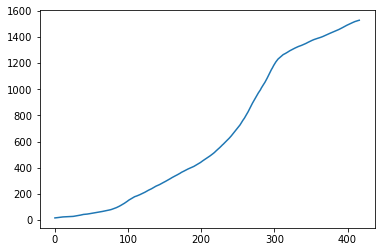

In [16]:
#obtain Death data D[n]

Groups = ['Group1', 'Group2', 'Group3', 'Group4']

D = dict()
for g in Groups:
    age_group = new_df.loc[g]
    Ii = []
    for k in range(0, 30):
        Ii.append(age_group['AR_TOTALDEATHS'].iloc[0])       #pad the front of signal
    for k in range(0, Days):
        Ii.append(age_group['AR_TOTALDEATHS'].iloc[k])
    for k in range(0, 30):
        Ii.append(age_group['AR_TOTALDEATHS'].iloc[Days-1])  #pad the end of signal 
    Ii = np.convolve(Ii, np.ones(15)/15, mode='same') #moving average filter 20 length
    D[g] = Ii[30:Days+30] #remove padding
    

plt.plot(range(Days),D['Group3'])


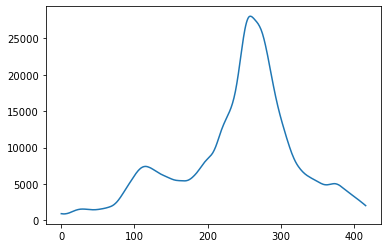

In [17]:
#derive infectious data I[n]
#Assume I[0] = 0.5*Inf[0]

I = dict()
for i in Groups:
    temp = []
    temp.append(Inf[i][0]*0.5)
    for k in range(1,Days):
        temp.append(temp[k-1]+newinf[i][k-1]-gamma*temp[k-1])
    I[i] = temp
plt.plot(range(Days),I['Group3'])

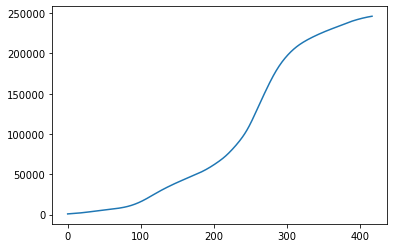

In [18]:
#derive Recovered data R[n]
R = dict()
for i in Groups:
    temp = []
    temp.append(Inf[i][0]*0.5)
    for k in range(1,Days):
        temp.append(temp[k-1]+gamma*I[i][k-1])
    temp = temp-D[i]
    R[i] = temp
plt.plot(range(Days),R['Group3'])

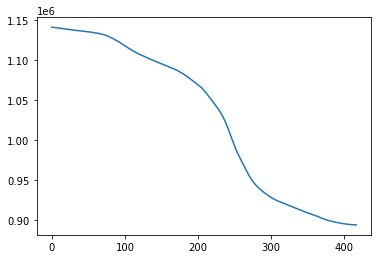

In [19]:
#obtain Susceptible data
age_pop = dict(zip(Groups, percentages))

S = dict()
for g in Groups:
    Si = []
    for i, j, k, m in zip(E[g], I[g], R[g], D[g]):
        Si.append(age_pop[g]*Population/100-i-j-k-m)
    S[g] = Si
plt.plot(range(len(S['Group3'])),S['Group3'])

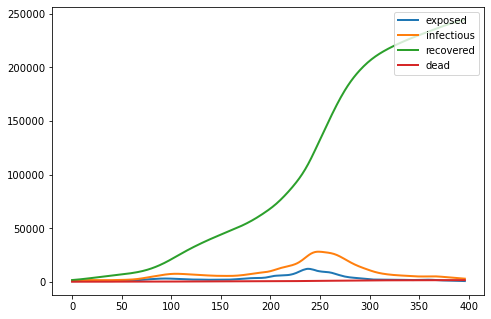

In [20]:
#truncate sequences and plot SEIR from data

for i in Groups:
    S[i] = S[i][10:Days-10]
    E[i] = E[i][10:Days-10]
    I[i] = I[i][10:Days-10]
    R[i] = R[i][10:Days-10]
    D[i] = D[i][10:Days-10]
    Inf[i] = Inf[i][10:Days-10]
Days = Days-20

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
#ax.plot(range(len(S['50-64'])),S['50-64'],lw=2,label='suceptible')
ax.plot(range(Days),E['Group3'],lw=2,label='exposed')
ax.plot(range(Days),I['Group3'],lw=2,label='infectious')
ax.plot(range(Days),R['Group3'],lw=2,label='recovered')
ax.plot(range(Days),D['Group3'],lw=2,label='dead')
#ax.set_ylabel(‘Price’,fontsize=20)
plt.legend(loc='upper right')

In [21]:
Groups = ['Group1', 'Group2', 'Group3', 'Group4']
labels = ['1','2','3','4']
for i in range(0,4):
    vars()['S_'+labels[i]] = S[Groups[i]]
    vars()['E_'+labels[i]] = E[Groups[i]]
    vars()['I_'+labels[i]] = I[Groups[i]]
    vars()['R_'+labels[i]] = R[Groups[i]]
    vars()['D_'+labels[i]] = D[Groups[i]]
    
N = []
for k in range(0, Days):
    Ni = 0
    for g in Groups:
        Ni = Ni + S[g][k]+E[g][k]+I[g][k]+R[g][k]
    N.append(Ni)
#plt.plot(range(len(N)),N)

epsilon = 1/5 # Rate of progression from exposed to infectious (the reciprocal is the incubation period)
gamma = 1/14 # Recovery rate of infectious individuals (the reciprocal is the infectious period)    

In [22]:

segment_size = 10
A_1 = np.ndarray(shape=(0,4))
for i in range(0,Days-1,segment_size):
    C_1 = np.ndarray(shape=(0,4))
    d_1 = np.ndarray(shape=(0,1))
    for t in range(i, i+segment_size):
        if(t<Days-1):
            c = [[-S_1[t]*I_1[t]/N[t], -S_1[t]*I_2[t]/N[t], -S_1[t]*I_3[t]/N[t], -S_1[t]*I_4[t]/N[t]],
                [S_1[t]*I_1[t]/N[t], S_1[t]*I_2[t]/N[t], S_1[t]*I_3[t]/N[t], S_1[t]*I_4[t]/N[t]]]
            C_1=np.append(C_1,c,axis = 0)

            partial_d = [[S_1[t+1]-S_1[t]], [E_1[t+1]-E_1[t]+epsilon*E_1[t]]]
            d_1=np.append(d_1,partial_d,axis = 0)
    d_1=np.squeeze(d_1)
    x = np.ndarray(shape=(1,4))
    x[0] = lsq_linear(C_1, d_1, bounds=(0, np.inf))['x']

    A_1 = np.append(A_1,x,axis = 0)
#print(A_1)

alpha_1 = np.ndarray(shape=(1,1))
C_1 = np.ndarray(shape=(0,1))
d_1 = np.ndarray(shape=(0,1))
for t in range(0,Days-1):
    c = [[I_1[t]]]
    C_1=np.append(C_1,c,axis = 0)
    d = [[D_1[t+1]-D_1[t]]]
    d_1=np.append(d_1,d,axis = 0)
d_1=np.squeeze(d_1)
alpha_1[0] = lsq_linear(C_1, d_1, bounds=(0, np.inf))['x']
#print(alpha_1)

#print("===============================================")
A_2 = np.ndarray(shape=(0,4))
for i in range(0,Days-1,segment_size):
    C_1 = np.ndarray(shape=(0,4))
    d_1 = np.ndarray(shape=(0,1))
    for t in range(i, i+segment_size):
        if(t<Days-1):
            c = [[-S_2[t]*I_1[t]/N[t], -S_2[t]*I_2[t]/N[t], -S_2[t]*I_3[t]/N[t], -S_2[t]*I_4[t]/N[t]],
                [S_2[t]*I_1[t]/N[t], S_2[t]*I_2[t]/N[t], S_2[t]*I_3[t]/N[t], S_2[t]*I_4[t]/N[t]]]
            C_1=np.append(C_1,c,axis = 0)

            partial_d = [[S_2[t+1]-S_2[t]], [E_2[t+1]-E_2[t]+epsilon*E_2[t]]]
            d_1=np.append(d_1,partial_d,axis = 0)
    d_1=np.squeeze(d_1)
    x = np.ndarray(shape=(1,4))
    x[0] = lsq_linear(C_1, d_1, bounds=(0, np.inf))['x']

    A_2 = np.append(A_2,x,axis = 0)
#print(A_2)

alpha_2 = np.ndarray(shape=(1,1))
C_1 = np.ndarray(shape=(0,1))
d_1 = np.ndarray(shape=(0,1))
for t in range(0,Days-1):
    c = [[I_2[t]]]
    C_1=np.append(C_1,c,axis = 0)
    d = [[D_2[t+1]-D_2[t]]]
    d_1=np.append(d_1,d,axis = 0)
d_1=np.squeeze(d_1)
x = np.ndarray(shape=(1,1))
alpha_2[0] = lsq_linear(C_1, d_1, bounds=(0, np.inf))['x']
#print(alpha_2)
#print("===============================================")
A_3 = np.ndarray(shape=(0,4))
for i in range(0,Days-1,segment_size):
    C_1 = np.ndarray(shape=(0,4))
    d_1 = np.ndarray(shape=(0,1))
    for t in range(i, i+segment_size):
        if(t<Days-1):
            c = [[-S_3[t]*I_1[t]/N[t], -S_3[t]*I_2[t]/N[t], -S_3[t]*I_3[t]/N[t], -S_3[t]*I_4[t]/N[t]],
                [S_3[t]*I_1[t]/N[t], S_3[t]*I_2[t]/N[t], S_3[t]*I_3[t]/N[t], S_3[t]*I_4[t]/N[t]]]
            C_1=np.append(C_1,c,axis = 0)

            partial_d = [[S_3[t+1]-S_3[t]], [E_3[t+1]-E_3[t]+epsilon*E_3[t]]]
            d_1=np.append(d_1,partial_d,axis = 0)
    d_1=np.squeeze(d_1)
    x = np.ndarray(shape=(1,4))
    x[0] = lsq_linear(C_1, d_1, bounds=(0, np.inf))['x']

    A_3 = np.append(A_3,x,axis = 0)
#print(A_3)

alpha_3 = np.ndarray(shape=(1,1))
C_1 = np.ndarray(shape=(0,1))
d_1 = np.ndarray(shape=(0,1))
for t in range(0,Days-1):
    c = [[I_3[t]]]
    C_1=np.append(C_1,c,axis = 0)
    d = [[D_3[t+1]-D_3[t]]]
    d_1=np.append(d_1,d,axis = 0)
d_1=np.squeeze(d_1)
x = np.ndarray(shape=(1,1))
alpha_3[0] = lsq_linear(C_1, d_1, bounds=(0, np.inf))['x']
#print(alpha_3)

#print("===============================================")
A_4 = np.ndarray(shape=(0,4))
for i in range(0,Days-1,segment_size):
    C_1 = np.ndarray(shape=(0,4))
    d_1 = np.ndarray(shape=(0,1))
    for t in range(i, i+segment_size):
        if(t<Days-1):
            c = [[-S_4[t]*I_1[t]/N[t], -S_4[t]*I_2[t]/N[t], -S_4[t]*I_3[t]/N[t], -S_4[t]*I_4[t]/N[t]],
                [S_4[t]*I_1[t]/N[t], S_4[t]*I_2[t]/N[t], S_4[t]*I_3[t]/N[t], S_4[t]*I_4[t]/N[t]]]
            C_1=np.append(C_1,c,axis = 0)

            partial_d = [[S_4[t+1]-S_4[t]], [E_4[t+1]-E_4[t]+epsilon*E_4[t]]]
            d_1=np.append(d_1,partial_d,axis = 0)
    d_1=np.squeeze(d_1)
    x = np.ndarray(shape=(1,4))
    x[0] = lsq_linear(C_1, d_1, bounds=(0, np.inf))['x']
    A_4 = np.append(A_4,x,axis = 0)
#print(A_4)

alpha_4 = np.ndarray(shape=(1,1))
C_1 = np.ndarray(shape=(0,1))
d_1 = np.ndarray(shape=(0,1))
for t in range(0,Days-1):
    c = [[I_4[t]]]
    C_1=np.append(C_1,c,axis = 0)
    d = [[D_4[t+1]-D_4[t]]]
    d_1=np.append(d_1,d,axis = 0)
d_1=np.squeeze(d_1)
x = np.ndarray(shape=(1,1))
alpha_4[0] = lsq_linear(C_1, d_1, bounds=(0, np.inf))['x']
#print(alpha_4)


Alpha:
[[2.46065459e-06]
 [3.82911608e-05]
 [3.99061834e-04]
 [4.63351844e-03]]
A:
[[7.65489741e-021 5.42736707e-022 3.72353959e-023 2.68535586e-001]
 [1.37272400e-014 1.51246590e-015 1.91724290e-016 8.22573573e-001]
 [7.21018867e-027 1.67555905e-030 5.19760729e-028 1.14374371e+000]
 [2.11565142e-020 1.61646309e-023 4.94065646e-324 6.13737172e-001]]


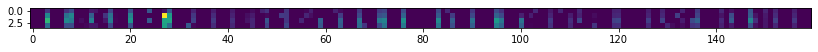

In [23]:
#Get A matrix and Alpha vector from simulations
#adding some amount of positive noise to A seems to mask the artifacts of least-squares problem solution
Alpha = np.ndarray(shape=(4,1))
Alpha[0] = alpha_1
Alpha[1] = alpha_2
Alpha[2] = alpha_3
Alpha[3] = alpha_4
A = np.ndarray(shape=(A_1.shape[0],4,4))
for i in range(A_1.shape[0]):
    A[i][0] = A_1[i]
    A[i][1] = A_2[i]
    A[i][2] = A_3[i]
    A[i][3] = A_4[i]
print("Alpha:")
print(Alpha)
print("A:")
print(A[0])
fig1, ax1 = plt.subplots(figsize=(14,4))
A_plot = np.ndarray(shape=(4,0))
for i in range(A.shape[0]):
    A_plot = np.concatenate((A_plot,A[i]),axis = 1)
ax1.imshow(A_plot)

In [24]:
#run SEIR simulation from estimated parameters

groups = 4
Ss = np.zeros((Days,groups))
Es = np.zeros((Days,groups))
Is = np.zeros((Days,groups))
Rs = np.zeros((Days,groups))
Ds = np.zeros((Days,groups))
CI = np.zeros((Days,groups))

for i in range(4):
    Ss[0][i]=S[Groups[i]][0]            # initial susceptible populatioon
    Es[0][i]=E[Groups[i]][0]                # initial exposed
    Is[0][i]=I[Groups[i]][0]               # initial infected
    Rs[0][i]=R[Groups[i]][0]
    Ds[0][i]=D[Groups[i]][0]

segment = -1
for i in range(0,Days-1):
    N = sum(Ss[i])+sum(Es[i])+sum(Is[i])+sum(Rs[i])

    if(i%segment_size == 0):
        segment = segment+1
    for j in range(0,groups):

        Ss[i+1][j] = Ss[i][j] - sum(np.multiply(A[segment][j],Is[i])*Ss[i][j])/N
        Es[i+1][j] = Es[i][j] + sum(np.multiply(A[segment][j],Is[i])*Ss[i][j])/N - epsilon*Es[i][j]
        Is[i+1][j] = Is[i][j] + epsilon*Es[i][j] - (Alpha[j]+gamma)*Is[i][j]
        Rs[i+1][j] = Rs[i][j] + gamma*Is[i][j]
        Ds[i+1][j] = Ds[i][j] + Alpha[j]*Is[i][j]
        CI[i+1][j] = CI[i][j] + epsilon*Es[i][j]
        #dI[i] = epsilon*E[i]
        #dD[i] = D[i+1] - D[i]

S1 = np.zeros((Days,1))
E1 = np.zeros((Days,1))
I1 = np.zeros((Days,1))
R1 = np.zeros((Days,1))
D1 = np.zeros((Days,1))

for i in range(0,Days):
    S1[i] = sum(Ss[i])
    E1[i] = sum(Es[i])
    I1[i] = sum(Is[i])
    R1[i] = sum(Rs[i])
    D1[i] = sum(Ds[i])


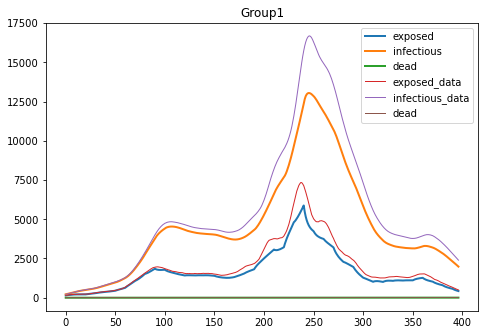

In [25]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
#ax.plot(Ss[:,0],lw=2,label='suceptible')
ax.plot(Es[:,0],lw=2,label='exposed')
ax.plot(Is[:,0],lw=2,label='infectious')
#ax.plot(Rs[:,0],lw=2,label='recovered')
ax.plot(Ds[:,0],lw=2,label='dead')
ax.plot(E[Groups[0]],lw=1,label='exposed_data')
ax.plot(I[Groups[0]],lw=1,label='infectious_data')
#ax.plot(R[ages[0]],lw=1,label='recovered_data')
ax.plot(D[Groups[0]],lw=1,label='dead')
ax.set_title("Group1")
#ax.set_ylabel(‘Price’,fontsize=20)
plt.legend(loc='upper right')

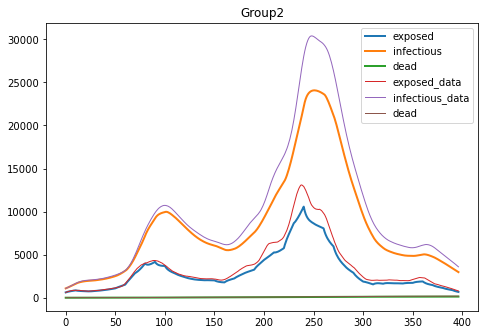

In [26]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
#ax.plot(Ss[:,0],lw=2,label='suceptible')
ax.plot(Es[:,1],lw=2,label='exposed')
ax.plot(Is[:,1],lw=2,label='infectious')
#ax.plot(Rs[:,1],lw=2,label='recovered')
ax.plot(Ds[:,1],lw=2,label='dead')
ax.plot(E[Groups[1]],lw=1,label='exposed_data')
ax.plot(I[Groups[1]],lw=1,label='infectious_data')
#ax.plot(R[ages[0]],lw=1,label='recovered_data')
ax.plot(D[Groups[1]],lw=1,label='dead')
ax.set_title("Group2")
#ax.set_ylabel(‘Price’,fontsize=20)
plt.legend(loc='upper right')

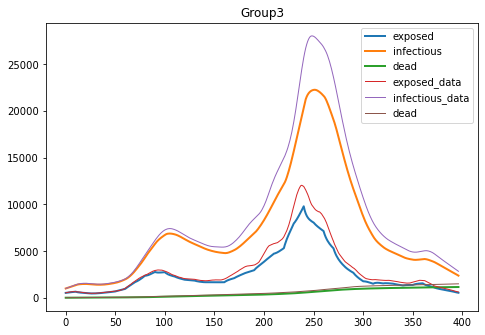

In [27]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
#ax.plot(Ss[:,2],lw=2,label='suceptible')
ax.plot(Es[:,2],lw=2,label='exposed')
ax.plot(Is[:,2],lw=2,label='infectious')
#ax.plot(Rs[:,2],lw=2,label='recovered')
ax.plot(Ds[:,2],lw=2,label='dead')
ax.plot(E[Groups[2]],lw=1,label='exposed_data')
ax.plot(I[Groups[2]],lw=1,label='infectious_data')
#ax.plot(R[ages[0]],lw=1,label='recovered_data')
ax.plot(D[Groups[2]],lw=1,label='dead')
ax.set_title("Group3")
#ax.set_ylabel(‘Price’,fontsize=20)
plt.legend(loc='upper right')

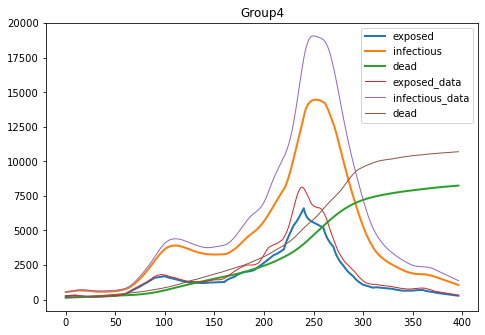

In [28]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
#ax.plot(Ss[:,3],lw=2,label='suceptible')
ax.plot(Es[:,3],lw=2,label='exposed')
ax.plot(Is[:,3],lw=2,label='infectious')
#ax.plot(Rs[:,2],lw=2,label='recovered')
ax.plot(Ds[:,3],lw=2,label='dead')
ax.plot(E[Groups[3]],lw=1,label='exposed_data')
ax.plot(I[Groups[3]],lw=1,label='infectious_data')
#ax.plot(R[ages[0]],lw=1,label='recovered_data')
ax.plot(D[Groups[3]],lw=1,label='dead')
ax.set_title("Group4")
#ax.set_ylabel(‘Price’,fontsize=20)
plt.legend(loc='upper right')

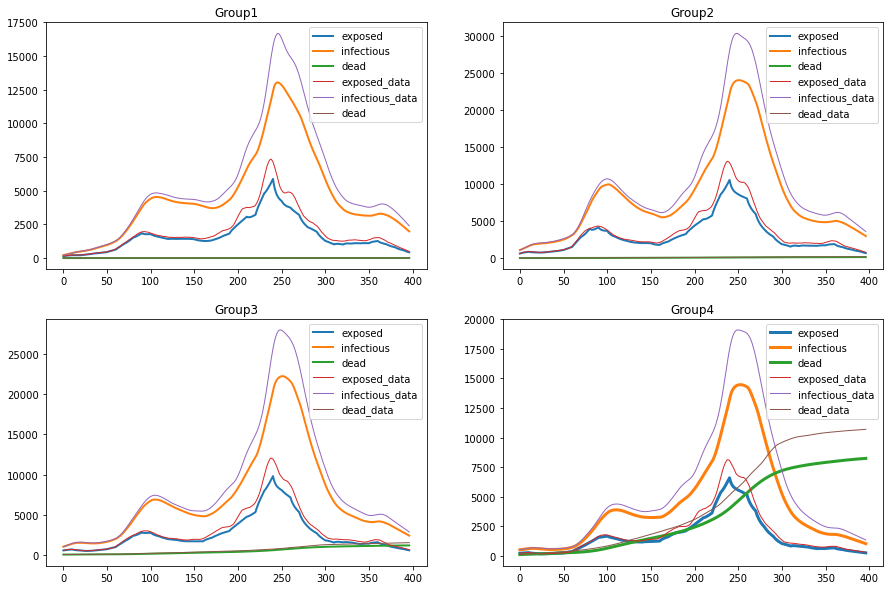

In [35]:
fig,ax = plt.subplots(2, 2, figsize = (15, 10))

ax[0,0].plot(Es[:,0],lw=2,label='exposed')
ax[0,0].plot(Is[:,0],lw=2,label='infectious')
ax[0,0].plot(Ds[:,0],lw=2,label='dead')
ax[0,0].plot(E[Groups[0]],lw=1,label='exposed_data')
ax[0,0].plot(I[Groups[0]],lw=1,label='infectious_data')
ax[0,0].plot(D[Groups[0]],lw=1,label='dead')
ax[0,0].set_title("Group1")
ax[0,0].legend(loc='upper right')


ax[0,1].plot(Es[:,1],lw=2,label='exposed')
ax[0,1].plot(Is[:,1],lw=2,label='infectious')
ax[0,1].plot(Ds[:,1],lw=2,label='dead')
ax[0,1].plot(E[Groups[1]],lw=1,label='exposed_data')
ax[0,1].plot(I[Groups[1]],lw=1,label='infectious_data')
ax[0,1].plot(D[Groups[1]],lw=1,label='dead_data')
ax[0,1].set_title("Group2")
ax[0,1].legend(loc='upper right')


ax[1,0].plot(Es[:,2],lw=2,label='exposed')
ax[1,0].plot(Is[:,2],lw=2,label='infectious')
ax[1,0].plot(Ds[:,2],lw=2,label='dead')
ax[1,0].plot(E[Groups[2]],lw=1,label='exposed_data')
ax[1,0].plot(I[Groups[2]],lw=1,label='infectious_data')
ax[1,0].plot(D[Groups[2]],lw=1,label='dead_data')
ax[1,0].set_title("Group3")
ax[1,0].legend(loc='upper right')


ax[1,1].plot(Es[:,3],lw=3,label='exposed')
ax[1,1].plot(Is[:,3],lw=3,label='infectious')
ax[1,1].plot(Ds[:,3],lw=3,label='dead')
ax[1,1].plot(E[Groups[3]],lw=1,label='exposed_data')
ax[1,1].plot(I[Groups[3]],lw=1,label='infectious_data')
ax[1,1].plot(D[Groups[3]],lw=1,label='dead_data')
ax[1,1].set_title("Group4")
ax[1,1].legend(loc='upper right')

plt.savefig('TN_result_method1', dpi = 500)

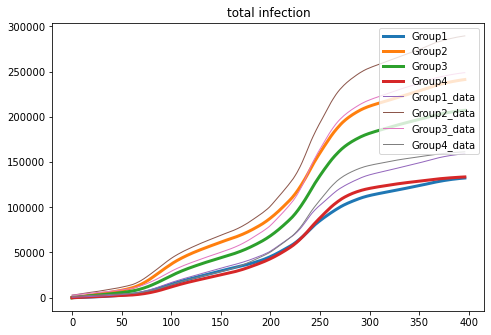

In [36]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
#ax.plot(Ss[:,3],lw=3,label='suceptible')
ax.plot(CI[:,0],lw=3,label=Groups[0])
ax.plot(CI[:,1],lw=3,label=Groups[1])
ax.plot(CI[:,2],lw=3,label=Groups[2])
ax.plot(CI[:,3],lw=3,label=Groups[3])

ax.plot(Inf[Groups[0]],lw=1,label=Groups[0]+'_data')
ax.plot(Inf[Groups[1]],lw=1,label=Groups[1]+'_data')
ax.plot(Inf[Groups[2]],lw=1,label=Groups[2]+'_data')
ax.plot(Inf[Groups[3]],lw=1,label=Groups[3]+'_data')
ax.set_title("total infection")
#ax.set_ylabel(‘Price’,fontsize=20)
plt.legend(loc='upper right')
plt.savefig('TN_total_infection_method1', dpi = 500)